# Importing

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [622]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec

In [581]:
df = pd.read_csv("netflix_titles.csv")

In [582]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


From the df.head() we can see the we that the column name "type" will be our

y_test value.

Now we pass in "sns.heatmap(df.isnull())" to see the null values of the dataset. As we can't work with null values

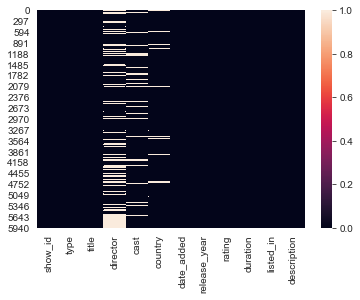

In [584]:
sns.heatmap(df.isnull());

From our heatmap showing the null value we can drop the null. But before dropping the null values, what order column or columns do we think we want to work on in order to predict the type of movie "type".?

looking at the columns, we only need the "duration" column. So we drop all other columns apart from "duration" and the "type" column

In [585]:
df.drop(["show_id", "description", "release_year", "title", "director","cast", "country", "date_added", "rating", "listed_in"], inplace = True, axis = 1)

In [586]:
df.head()

,type,duration
0,Movie,90 min
1,Movie,94 min
2,TV Show,1 Season
3,TV Show,1 Season
4,Movie,99 min


checking the head to confirm

Notice that the type column is a categorical feature. So we will use pandas to get the dummies of "type", but will not set drop_first = "True"

In [587]:
Types = ["type"]

In [588]:
df = pd.get_dummies(df, columns = Types)

In [589]:
df.head()

,duration,type_Movie,type_TV Show
0,90 min,1,0
1,94 min,1,0
2,1 Season,0,1
3,1 Season,0,1
4,99 min,1,0


As we all know, TV shows are all in seasons having episodes in each season. Therefore we set all the seasons to 1 and all other to 0. You can do this with a function. But here i used a plan method that also works to set them, but is kind of long. We need to set them to 0 and 1 as we can't used numerical features.

In [590]:
df.duration[df.duration == "1 Season"] = 1.0
df.duration[df.duration == "2 Seasons"] = 1.0
df.duration[df.duration == "3 Seasons"] = 1.0
df.duration[df.duration == "4 Seasons"] = 1.0
df.duration[df.duration == "5 Seasons"] = 1.0
df.duration[df.duration == "6 Seasons"] = 1.0
df.duration[df.duration == "7 Seasons"] = 1.0
df.duration[df.duration == "8 Seasons"] = 1.0
df.duration[df.duration == "9 Seasons"] = 1.0
df.duration[df.duration == "10 Seasons"] = 1.0
df.duration[df.duration == "11 Seasons"] = 1.0
df.duration[df.duration == "12 Seasons"] = 1.0
df.duration[df.duration == "13 Seasons"] = 1.0
df.duration[df.duration == "14 Seasons"] = 1.0
df.duration[df.duration == "15 Seasons"] = 1.0

C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [591]:
df.duration[df.duration ==  "3 min"] = 0.0
df.duration[df.duration ==  "10 min"] = 0.0
df.duration[df.duration ==  "11 min"] = 0.0
df.duration[df.duration ==  "12 min"] = 0.0
df.duration[df.duration ==  "14 min"] = 0.0
df.duration[df.duration ==  "15 min"] = 0.0
df.duration[df.duration ==  "17 min"] = 0.0
df.duration[df.duration ==  "18 min"] = 0.0
df.duration[df.duration ==  "19 min"] = 0.0
df.duration[df.duration ==  "20 min"] = 0.0
df.duration[df.duration ==  "21 min"] = 0.0
df.duration[df.duration ==  "22 min"] = 0.0
df.duration[df.duration ==  "23 min"] = 0.0
df.duration[df.duration ==  "24 min"] = 0.0
df.duration[df.duration ==  "25 min"] = 0.0
df.duration[df.duration ==  "26 min"] = 0.0
df.duration[df.duration ==  "27 min"] = 0.0
df.duration[df.duration ==  "28 min"] = 0.0
df.duration[df.duration ==  "29 min"] = 0.0
df.duration[df.duration ==  "30 min"] = 0.0
df.duration[df.duration ==  "31 min"] = 0.0
df.duration[df.duration ==  "32 min"] = 0.0
df.duration[df.duration ==  "33 min"] = 0.0
df.duration[df.duration ==  "34 min"] = 0.0
df.duration[df.duration ==  "35 min"] = 0.0
df.duration[df.duration ==  "36 min"] = 0.0
df.duration[df.duration ==  "37 min"] = 0.0
df.duration[df.duration ==  "38 min"] = 0.0
df.duration[df.duration ==  "39 min"] = 0.0
df.duration[df.duration ==  "40 min"] = 0.0
df.duration[df.duration ==  "41 min"] = 0.0
df.duration[df.duration ==  "42 min"] = 0.0
df.duration[df.duration ==  "43 min"] = 0.0
df.duration[df.duration ==  "44 min"] = 0.0
df.duration[df.duration ==  "45 min"] = 0.0
df.duration[df.duration ==  "46 min"] = 0.0
df.duration[df.duration ==  "47 min"] = 0.0
df.duration[df.duration ==  "48 min"] = 0.0
df.duration[df.duration ==  "49 min"] = 0.0
df.duration[df.duration ==  "50 min"] = 0.0
df.duration[df.duration ==  "51 min"] = 0.0
df.duration[df.duration ==  "52 min"] = 0.0
df.duration[df.duration ==  "53 min"] = 0.0
df.duration[df.duration ==  "54 min"] = 0.0
df.duration[df.duration ==  "55 min"] = 0.0
df.duration[df.duration ==  "56 min"] = 0.0
df.duration[df.duration ==  "57 min"] = 0.0
df.duration[df.duration ==  "58 min"] = 0.0
df.duration[df.duration ==  "59 min"] = 0.0
df.duration[df.duration ==  "60 min"] = 0.0
df.duration[df.duration ==  "61 min"] = 0.0
df.duration[df.duration ==  "62 min"] = 0.0
df.duration[df.duration ==  "63 min"] = 0.0
df.duration[df.duration ==  "64 min"] = 0.0
df.duration[df.duration ==  "65 min"] = 0.0
df.duration[df.duration ==  "66 min"] = 0.0
df.duration[df.duration ==  "67 min"] = 0.0
df.duration[df.duration ==  "68 min"] = 0.0
df.duration[df.duration ==  "69 min"] = 0.0
df.duration[df.duration ==  "70 min"] = 0.0
df.duration[df.duration ==  "71 min"] = 0.0
df.duration[df.duration ==  "72 min"] = 0.0
df.duration[df.duration ==  "73 min"] = 0.0
df.duration[df.duration ==  "74 min"] = 0.0
df.duration[df.duration ==  "75 min"] = 0.0
df.duration[df.duration ==  "76 min"] = 0.0
df.duration[df.duration ==  "77 min"] = 0.0
df.duration[df.duration ==  "78 min"] = 0.0
df.duration[df.duration ==  "79 min"] = 0.0
df.duration[df.duration ==  "80 min"] = 0.0
df.duration[df.duration ==  "81 min"] = 0.0
df.duration[df.duration ==  "82 min"] = 0.0
df.duration[df.duration ==  "83 min"] = 0.0
df.duration[df.duration ==  "84 min"] = 0.0
df.duration[df.duration ==  "85 min"] = 0.0
df.duration[df.duration ==  "86 min"] = 0.0
df.duration[df.duration ==  "87 min"] = 0.0
df.duration[df.duration ==  "88 min"] = 0.0
df.duration[df.duration ==  "89 min"] = 0.0
df.duration[df.duration ==  "90 min"] = 0.0
df.duration[df.duration ==  "91 min"] = 0.0
df.duration[df.duration ==  "92 min"] = 0.0
df.duration[df.duration ==  "93 min"] = 0.0
df.duration[df.duration ==  "94 min"] = 0.0
df.duration[df.duration ==  "95 min"] = 0.0
df.duration[df.duration ==  "96 min"] = 0.0
df.duration[df.duration ==  "97 min"] = 0.0
df.duration[df.duration ==  "98 min"] = 0.0
df.duration[df.duration ==  "99 min"] = 0.0
df.duration[df.duration ==  "100 min"] = 0.0
df.duration[df.duration ==  "101 min"] = 0.0
df.duration[df.duration ==  "102 min"] = 0.0
df.duration[df.duration ==  "103 min"] = 0.0
df.duration[df.duration ==  "104 min"] = 0.0
df.duration[df.duration ==  "105 min"] = 0.0
df.duration[df.duration ==  "106 min"] = 0.0
df.duration[df.duration ==  "107 min"] = 0.0
df.duration[df.duration ==  "108 min"] = 0.0
df.duration[df.duration ==  "109 min"] = 0.0
df.duration[df.duration ==  "110 min"] = 0.0
df.duration[df.duration ==  "111 min"] = 0.0
df.duration[df.duration ==  "112 min"] = 0.0
df.duration[df.duration ==  "113 min"] = 0.0
df.duration[df.duration ==  "114 min"] = 0.0
df.duration[df.duration ==  "115 min"] = 0.0
df.duration[df.duration ==  "116 min"] = 0.0
df.duration[df.duration ==  "117 min"] = 0.0
df.duration[df.duration ==  "118 min"] = 0.0
df.duration[df.duration ==  "119 min"] = 0.0
df.duration[df.duration ==  "120 min"] = 0.0
df.duration[df.duration ==  "121 min"] = 0.0
df.duration[df.duration ==  "122 min"] = 0.0
df.duration[df.duration ==  "123 min"] = 0.0
df.duration[df.duration ==  "124 min"] = 0.0
df.duration[df.duration ==  "125 min"] = 0.0
df.duration[df.duration ==  "126 min"] = 0.0
df.duration[df.duration ==  "127 min"] = 0.0
df.duration[df.duration ==  "128 min"] = 0.0
df.duration[df.duration ==  "129 min"] = 0.0
df.duration[df.duration ==  "130 min"] = 0.0
df.duration[df.duration ==  "131 min"] = 0.0
df.duration[df.duration ==  "132 min"] = 0.0
df.duration[df.duration ==  "133 min"] = 0.0
df.duration[df.duration ==  "134 min"] = 0.0
df.duration[df.duration ==  "135 min"] = 0.0
df.duration[df.duration ==  "136 min"] = 0.0
df.duration[df.duration ==  "137 min"] = 0.0
df.duration[df.duration ==  "138 min"] = 0.0
df.duration[df.duration ==  "139 min"] = 0.0
df.duration[df.duration ==  "140 min"] = 0.0
df.duration[df.duration ==  "141 min"] = 0.0
df.duration[df.duration ==  "142 min"] = 0.0
df.duration[df.duration ==  "143 min"] = 0.0
df.duration[df.duration ==  "144 min"] = 0.0
df.duration[df.duration ==  "145 min"] = 0.0
df.duration[df.duration ==  "146 min"] = 0.0
df.duration[df.duration ==  "147 min"] = 0.0
df.duration[df.duration ==  "148 min"] = 0.0
df.duration[df.duration ==  "149 min"] = 0.0
df.duration[df.duration ==  "150 min"] = 0.0
df.duration[df.duration ==  "151 min"] = 0.0
df.duration[df.duration ==  "152 min"] = 0.0
df.duration[df.duration ==  "153 min"] = 0.0
df.duration[df.duration ==  "154 min"] = 0.0
df.duration[df.duration ==  "155 min"] = 0.0
df.duration[df.duration ==  "156 min"] = 0.0
df.duration[df.duration ==  "157 min"] = 0.0
df.duration[df.duration ==  "158 min"] = 0.0
df.duration[df.duration ==  "150 min"] = 0.0
df.duration[df.duration ==  "159 min"] = 0.0
df.duration[df.duration ==  "160 min"] = 0.0
df.duration[df.duration ==  "161 min"] = 0.0
df.duration[df.duration ==  "162 min"] = 0.0
df.duration[df.duration ==  "163 min"] = 0.0
df.duration[df.duration ==  "164 min"] = 0.0
df.duration[df.duration ==  "165 min"] = 0.0
df.duration[df.duration ==  "166 min"] = 0.0
df.duration[df.duration ==  "167 min"] = 0.0
df.duration[df.duration ==  "168 min"] = 0.0
df.duration[df.duration ==  "169 min"] = 0.0
df.duration[df.duration ==  "170 min"] = 0.0
df.duration[df.duration ==  "171 min"] = 0.0
df.duration[df.duration ==  "172 min"] = 0.0
df.duration[df.duration ==  "173 min"] = 0.0
df.duration[df.duration ==  "174 min"] = 0.0
df.duration[df.duration ==  "175 min"] = 0.0
df.duration[df.duration ==  "176 min"] = 0.0
df.duration[df.duration ==  "177 min"] = 0.0
df.duration[df.duration ==  "178 min"] = 0.0
df.duration[df.duration ==  "179 min"] = 0.0
df.duration[df.duration ==  "180 min"] = 0.0
df.duration[df.duration ==  "181 min"] = 0.0
df.duration[df.duration ==  "182 min"] = 0.0
df.duration[df.duration ==  "183 min"] = 0.0
df.duration[df.duration ==  "184 min"] = 0.0
df.duration[df.duration ==  "185 min"] = 0.0
df.duration[df.duration ==  "186 min"] = 0.0
df.duration[df.duration ==  "187 min"] = 0.0
df.duration[df.duration ==  "188 min"] = 0.0
df.duration[df.duration ==  "189 min"] = 0.0
df.duration[df.duration ==  "190 min"] = 0.0
df.duration[df.duration ==  "191 min"] = 0.0
df.duration[df.duration ==  "192 min"] = 0.0
df.duration[df.duration ==  "193 min"] = 0.0
df.duration[df.duration ==  "194 min"] = 0.0
df.duration[df.duration ==  "195 min"] = 0.0
df.duration[df.duration ==  "196 min"] = 0.0
df.duration[df.duration ==  "197 min"] = 0.0
df.duration[df.duration ==  "198 min"] = 0.0
df.duration[df.duration ==  "199 min"] = 0.0
df.duration[df.duration ==  "200 min"] = 0.0
df.duration[df.duration ==  "201 min"] = 0.0
df.duration[df.duration ==  "202 min"] = 0.0
df.duration[df.duration ==  "203 min"] = 0.0
df.duration[df.duration ==  "204 min"] = 0.0
df.duration[df.duration ==  "205 min"] = 0.0
df.duration[df.duration ==  "206 min"] = 0.0
df.duration[df.duration ==  "207 min"] = 0.0
df.duration[df.duration ==  "208 min"] = 0.0
df.duration[df.duration ==  "209 min"] = 0.0
df.duration[df.duration ==  "210 min"] = 0.0
df.duration[df.duration ==  "211 min"] = 0.0
df.duration[df.duration ==  "212 min"] = 0.0
df.duration[df.duration ==  "213 min"] = 0.0
df.duration[df.duration ==  "214 min"] = 0.0
df.duration[df.duration ==  "215 min"] = 0.0
df.duration[df.duration ==  "216 min"] = 0.0
df.duration[df.duration ==  "217 min"] = 0.0
df.duration[df.duration ==  "218 min"] = 0.0
df.duration[df.duration ==  "219 min"] = 0.0
df.duration[df.duration ==  "220 min"] = 0.0
df.duration[df.duration ==  "221 min"] = 0.0
df.duration[df.duration ==  "222 min"] = 0.0
df.duration[df.duration ==  "223 min"] = 0.0
df.duration[df.duration ==  "224 min"] = 0.0
df.duration[df.duration ==  "225 min"] = 0.0
df.duration[df.duration ==  "226 min"] = 0.0
df.duration[df.duration ==  "227 min"] = 0.0
df.duration[df.duration ==  "228 min"] = 0.0
df.duration[df.duration ==  "229 min"] = 0.0
df.duration[df.duration ==  "230 min"] = 0.0
df.duration[df.duration ==  "231 min"] = 0.0
df.duration[df.duration ==  "232 min"] = 0.0
df.duration[df.duration ==  "233 min"] = 0.0
df.duration[df.duration ==  "234 min"] = 0.0
df.duration[df.duration ==  "235 min"] = 0.0
df.duration[df.duration ==  "236 min"] = 0.0
df.duration[df.duration ==  "237 min"] = 0.0
df.duration[df.duration ==  "238 min"] = 0.0
df.duration[df.duration ==  "239 min"] = 0.0
df.duration[df.duration ==  "240 min"] = 0.0
df.duration[df.duration ==  "241 min"] = 0.0
df.duration[df.duration ==  "242 min"] = 0.0
df.duration[df.duration ==  "243 min"] = 0.0
df.duration[df.duration ==  "244 min"] = 0.0
df.duration[df.duration ==  "245 min"] = 0.0
df.duration[df.duration ==  "246 min"] = 0.0
df.duration[df.duration ==  "247 min"] = 0.0
df.duration[df.duration ==  "248 min"] = 0.0
df.duration[df.duration ==  "249 min"] = 0.0
df.duration[df.duration ==  "250 min"] = 0.0
df.duration[df.duration ==  "251 min"] = 0.0
df.duration[df.duration ==  "252 min"] = 0.0
df.duration[df.duration ==  "253 min"] = 0.0
df.duration[df.duration ==  "254 min"] = 0.0
df.duration[df.duration ==  "255 min"] = 0.0
df.duration[df.duration ==  "256 min"] = 0.0
df.duration[df.duration ==  "257 min"] = 0.0
df.duration[df.duration ==  "258 min"] = 0.0
df.duration[df.duration ==  "259 min"] = 0.0
df.duration[df.duration ==  "260 min"] = 0.0
df.duration[df.duration ==  "261 min"] = 0.0
df.duration[df.duration ==  "262 min"] = 0.0
df.duration[df.duration ==  "263 min"] = 0.0
df.duration[df.duration ==  "264 min"] = 0.0
df.duration[df.duration ==  "265 min"] = 0.0
df.duration[df.duration ==  "266 min"] = 0.0
df.duration[df.duration ==  "267 min"] = 0.0
df.duration[df.duration ==  "268 min"] = 0.0
df.duration[df.duration ==  "269 min"] = 0.0
df.duration[df.duration ==  "270 min"] = 0.0
df.duration[df.duration ==  "271 min"] = 0.0
df.duration[df.duration ==  "272 min"] = 0.0
df.duration[df.duration ==  "273 min"] = 0.0
df.duration[df.duration ==  "274 min"] = 0.0
df.duration[df.duration ==  "275 min"] = 0.0
df.duration[df.duration ==  "276 min"] = 0.0
df.duration[df.duration ==  "277 min"] = 0.0
df.duration[df.duration ==  "278 min"] = 0.0
df.duration[df.duration ==  "279 min"] = 0.0
df.duration[df.duration ==  "280 min"] = 0.0
df.duration[df.duration ==  "281 min"] = 0.0
df.duration[df.duration ==  "282 min"] = 0.0
df.duration[df.duration ==  "283 min"] = 0.0
df.duration[df.duration ==  "284 min"] = 0.0
df.duration[df.duration ==  "285 min"] = 0.0
df.duration[df.duration ==  "286 min"] = 0.0
df.duration[df.duration ==  "287 min"] = 0.0
df.duration[df.duration ==  "288 min"] = 0.0
df.duration[df.duration ==  "289 min"] = 0.0
df.duration[df.duration ==  "290 min"] = 0.0
df.duration[df.duration ==  "291 min"] = 0.0
df.duration[df.duration ==  "292 min"] = 0.0
df.duration[df.duration ==  "293 min"] = 0.0
df.duration[df.duration ==  "294 min"] = 0.0
df.duration[df.duration ==  "295 min"] = 0.0
df.duration[df.duration ==  "296 min"] = 0.0
df.duration[df.duration ==  "297 min"] = 0.0
df.duration[df.duration ==  "298 min"] = 0.0
df.duration[df.duration ==  "299 min"] = 0.0
df.duration[df.duration ==  "300 min"] = 0.0
df.duration[df.duration ==  "301 min"] = 0.0
df.duration[df.duration ==  "302 min"] = 0.0
df.duration[df.duration ==  "303 min"] = 0.0
df.duration[df.duration ==  "304 min"] = 0.0
df.duration[df.duration ==  "305 min"] = 0.0
df.duration[df.duration ==  "306 min"] = 0.0
df.duration[df.duration ==  "307 min"] = 0.0
df.duration[df.duration ==  "308 min"] = 0.0
df.duration[df.duration ==  "309 min"] = 0.0
df.duration[df.duration ==  "310 min"] = 0.0
df.duration[df.duration ==  "311 min"] = 0.0
df.duration[df.duration ==  "312 min"] = 0.0
df.duration[df.duration ==  "313 min"] = 0.0
df.duration[df.duration ==  "314 min"] = 0.0
df.duration[df.duration ==  "315 min"] = 0.0
df.duration[df.duration ==  "316 min"] = 0.0
df.duration[df.duration ==  "317 min"] = 0.0
df.duration[df.duration ==  "318 min"] = 0.0
df.duration[df.duration ==  "319 min"] = 0.0
df.duration[df.duration ==  "320 min"] = 0.0
df.duration[df.duration ==  "321 min"] = 0.0
df.duration[df.duration ==  "322 min"] = 0.0
df.duration[df.duration ==  "323 min"] = 0.0
df.duration[df.duration ==  "324 min"] = 0.0
df.duration[df.duration ==  "325 min"] = 0.0
df.duration[df.duration ==  "326 min"] = 0.0
df.duration[df.duration ==  "327 min"] = 0.0
df.duration[df.duration ==  "328 min"] = 0.0
df.duration[df.duration ==  "329 min"] = 0.0
df.duration[df.duration ==  "330 min"] = 0.0
df.duration[df.duration ==  "331 min"] = 0.0
df.duration[df.duration ==  "332 min"] = 0.0
df.duration[df.duration ==  "333 min"] = 0.0
df.duration[df.duration ==  "334 min"] = 0.0
df.duration[df.duration ==  "335 min"] = 0.0
df.duration[df.duration ==  "336 min"] = 0.0
df.duration[df.duration ==  "337 min"] = 0.0
df.duration[df.duration ==  "338 min"] = 0.0
df.duration[df.duration ==  "339 min"] = 0.0
df.duration[df.duration ==  "340 min"] = 0.0
df.duration[df.duration ==  "341 min"] = 0.0
df.duration[df.duration ==  "342 min"] = 0.0
df.duration[df.duration ==  "343 min"] = 0.0
df.duration[df.duration ==  "344 min"] = 0.0
df.duration[df.duration ==  "345 min"] = 0.0
df.duration[df.duration ==  "346 min"] = 0.0
df.duration[df.duration ==  "347 min"] = 0.0
df.duration[df.duration ==  "348 min"] = 0.0
df.duration[df.duration ==  "349 min"] = 0.0
df.duration[df.duration ==  "350 min"] = 0.0
df.duration[df.duration ==  "351 min"] = 0.0
df.duration[df.duration ==  "352 min"] = 0.0
df.duration[df.duration ==  "353 min"] = 0.0
df.duration[df.duration ==  "354 min"] = 0.0
df.duration[df.duration ==  "355 min"] = 0.0
df.duration[df.duration ==  "356 min"] = 0.0
df.duration[df.duration ==  "357 min"] = 0.0
df.duration[df.duration ==  "358 min"] = 0.0
df.duration[df.duration ==  "359 min"] = 0.0
df.duration[df.duration ==  "360 min"] = 0.0
df.duration[df.duration ==  "361 min"] = 0.0
df.duration[df.duration ==  "362 min"] = 0.0
df.duration[df.duration ==  "363 min"] = 0.0
df.duration[df.duration ==  "364 min"] = 0.0
df.duration[df.duration ==  "365 min"] = 0.0
df.duration[df.duration ==  "366 min"] = 0.0
df.duration[df.duration ==  "367 min"] = 0.0
df.duration[df.duration ==  "368 min"] = 0.0
df.duration[df.duration ==  "369 min"] = 0.0
df.duration[df.duration ==  "370 min"] = 0.0
df.duration[df.duration ==  "371 min"] = 0.0
df.duration[df.duration ==  "372 min"] = 0.0
df.duration[df.duration ==  "373 min"] = 0.0
df.duration[df.duration ==  "374 min"] = 0.0
df.duration[df.duration ==  "375 min"] = 0.0
df.duration[df.duration ==  "376 min"] = 0.0
df.duration[df.duration ==  "377 min"] = 0.0
df.duration[df.duration ==  "378 min"] = 0.0
df.duration[df.duration ==  "379 min"] = 0.0
df.duration[df.duration ==  "380 min"] = 0.0
df.duration[df.duration ==  "381 min"] = 0.0
df.duration[df.duration ==  "382 min"] = 0.0
df.duration[df.duration ==  "383 min"] = 0.0
df.duration[df.duration ==  "384 min"] = 0.0
df.duration[df.duration ==  "385 min"] = 0.0
df.duration[df.duration ==  "386 min"] = 0.0
df.duration[df.duration ==  "387 min"] = 0.0
df.duration[df.duration ==  "388 min"] = 0.0
df.duration[df.duration ==  "389 min"] = 0.0
df.duration[df.duration ==  "390 min"] = 0.0
df.duration[df.duration ==  "391 min"] = 0.0
df.duration[df.duration ==  "392 min"] = 0.0
df.duration[df.duration ==  "393 min"] = 0.0
df.duration[df.duration ==  "394 min"] = 0.0
df.duration[df.duration ==  "395 min"] = 0.0
df.duration[df.duration ==  "396 min"] = 0.0
df.duration[df.duration ==  "397 min"] = 0.0
df.duration[df.duration ==  "398 min"] = 0.0
df.duration[df.duration ==  "399 min"] = 0.0
df.duration[df.duration ==  "400 min"] = 0.0

C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value i

C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A val

C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:274: SettingWithCopyWarning: 
A val

C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\promi\Anaconda3\lib\site-packages\ipykernel_launcher.py:365: SettingWithCopyWarning: 
A val

In [592]:
df.head()

,duration,type_Movie,type_TV Show
0,0,1,0
1,0,1,0
2,1,0,1
3,1,0,1
4,0,1,0


checking the head

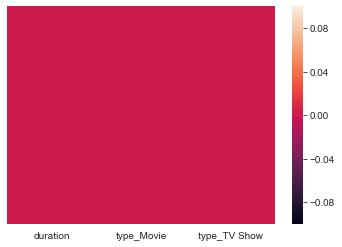

In [593]:
sns.heatmap(df.isnull(), yticklabels = False);

checking the null values.

Good to go!!

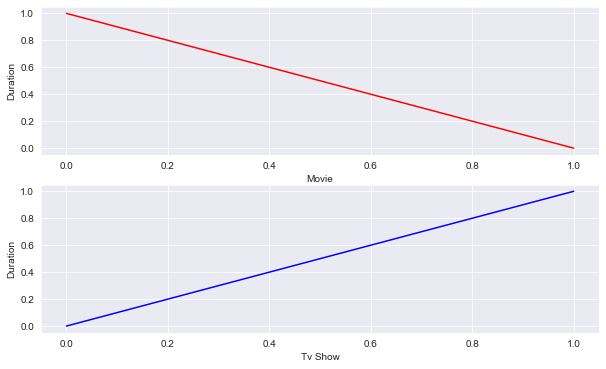

In [594]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 6))

ax1.plot(df["type_Movie"], df["duration"], color = "red")
ax1.set_xlabel("Movie")
ax1.set_ylabel("Duration")

ax2.plot(df["type_TV Show"], df["duration"], color = "blue")
ax2.set_xlabel("Tv Show")
ax2.set_ylabel("Duration")

plt.show()

Now from this plot we can see that in

movie plot: The lower the duration the higher it is a Movie

AND

Tv show: The higher the duration the higher the it is a Tv show.

............................

# train_test_split

In [602]:
df.columns

Index(['duration', 'type_Movie', 'type_TV Show'], dtype='object')

In [603]:
#setting our y as "type_Movie"
X = df[['duration', 'type_Movie', 'type_TV Show']]
y = df["type_Movie"] 

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [606]:
LinearR = LinearRegression()

In [607]:
LinearR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# prediction

In [608]:
prediction = LinearR.predict(X_test)

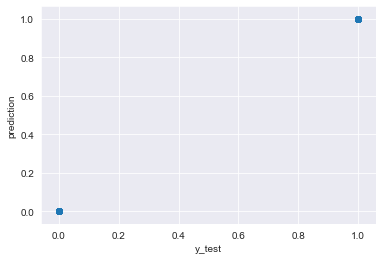

In [632]:
#scatterplot to view the real test value and the prediction
plt.scatter(y_test,prediction)
plt.xlabel("y_test")
plt.ylabel("prediction")

plt.show()

# evaluation of the model

In [634]:
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.7298669293362012e-15
MSE: 8.622520324794434e-30
RMSE: 2.93641283282757e-15
